In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample corpus with four documents
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "A brown fox is quick and jumps over a lazy dog.",
    "The dog is sleeping peacefully.",
    "A brown dog is jumping over a lazy fox."
]

# Tokenize and remove stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word not in stop_words]
    return " ".join(words)

corpus = [preprocess_text(doc) for doc in corpus]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Calculate cosine similarity between sentences
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the similarity matrix
for i in range(len(corpus)):
    for j in range(len(corpus)):
        print(f"Similarity between Document {i + 1} and Document {j + 1}: {similarity_matrix[i][j]:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Similarity between Document 1 and Document 1: 1.0000
Similarity between Document 1 and Document 2: 0.9028
Similarity between Document 1 and Document 3: 0.2867
Similarity between Document 1 and Document 4: 0.5163
Similarity between Document 2 and Document 1: 0.9028
Similarity between Document 2 and Document 2: 1.0000
Similarity between Document 2 and Document 3: 0.0967
Similarity between Document 2 and Document 4: 0.5719
Similarity between Document 3 and Document 1: 0.2867
Similarity between Document 3 and Document 2: 0.0967
Similarity between Document 3 and Document 3: 1.0000
Similarity between Document 3 and Document 4: 0.1014
Similarity between Document 4 and Document 1: 0.5163
Similarity between Document 4 and Document 2: 0.5719
Similarity between Document 4 and Document 3: 0.1014
Similarity between Document 4 and Document 4: 1.0000


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


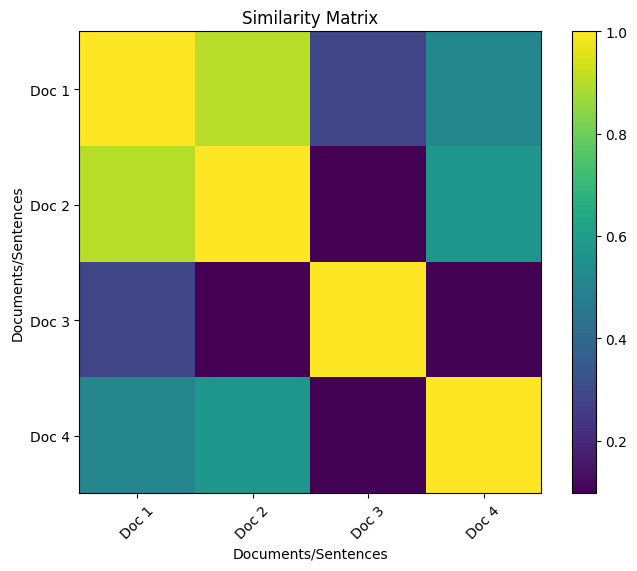

In [2]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Sample corpus with four documents
corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "A brown fox is quick and jumps over a lazy dog.",
    "The dog is sleeping peacefully.",
    "A brown dog is jumping over a lazy fox."
]

# Tokenize and remove stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum() and word not in stop_words]
    return " ".join(words)

corpus = [preprocess_text(doc) for doc in corpus]

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Calculate cosine similarity between sentences
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title("Similarity Matrix")
plt.xlabel("Documents/Sentences")
plt.ylabel("Documents/Sentences")
plt.xticks(range(len(corpus)), [f"Doc {i+1}" for i in range(len(corpus))], rotation=45)
plt.yticks(range(len(corpus)), [f"Doc {i+1}" for i in range(len(corpus))])
plt.show()
